In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
train=(x_train.shape,y_train.shape)
test=(x_test.shape,y_test.shape)

In [6]:
print('train_data',train)
print('test_data',test)

train_data ((60000, 28, 28), (60000,))
test_data ((10000, 28, 28), (10000,))


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

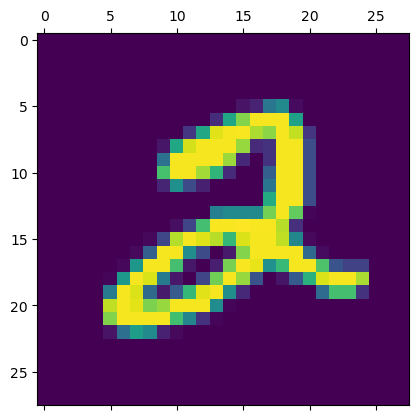

In [8]:
 plt.matshow(x_train[5])
  

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# flatten Data

In [10]:
x_train_flatten=x_train.reshape(60000,-1)
x_test_flatten=x_test.reshape(10000,-1)

In [11]:
print('x_train_F_shape:',x_train_flatten.shape)
print('x_test_F_shape:',x_test_flatten.shape)

x_train_F_shape: (60000, 784)
x_test_F_shape: (10000, 784)


In [12]:
#normalizes the images like(width,height,channel(RGB))
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [13]:
# change the data type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#normalizes the images using total Dim No 255
x_train=x_train/255
x_test=x_test/255

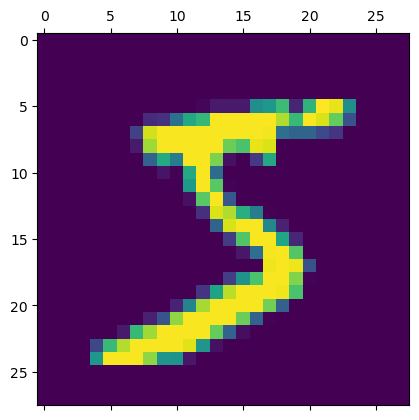

In [14]:
plt.matshow(x_train[0])

In [15]:
# Convolutional layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

input_shape=(28,28,1)

model=Sequential()
model.add(Conv2D(filters=5, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters=5, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
# flatten
model.add(Flatten())

In [17]:
from keras.layers import Dense,Dropout,Flatten
# fully conected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # You can use other optimizers like 'Adadelta'
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Print a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 5)         130       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 5)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 5)           630       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 5)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 128)               1

In [18]:
#convert class vector into binary
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [19]:
model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 15s 15ms/step - loss: 0.5624 - accuracy: 0.8190 - val_loss: 0.1251 - val_accuracy: 0.9583
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2006 - accuracy: 0.9434 - val_loss: 0.0844 - val_accuracy: 0.9728
Epoch 3/10
938/938 [==============================] - 16s 18ms/step - loss: 0.1511 - accuracy: 0.9581 - val_loss: 0.0780 - val_accuracy: 0.9767
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1276 - accuracy: 0.9657 - val_loss: 0.0648 - val_accuracy: 0.9809
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1145 - accuracy: 0.9698 - val_loss: 0.0582 - val_accuracy: 0.9830
Epoch 6/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0982 - accuracy: 0.9727 - val_loss: 0.0543 - val_accuracy: 0.9846
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0913 - accuracy: 0.9754 - val_loss: 0.0562 - val_accuracy:

In [20]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0524 - accuracy: 0.9849
Test loss: 0.05236373469233513
Test accuracy: 0.9848999977111816


In [21]:
predict=model.predict(x_test)
predict[1]

313/313 [==============================] - 2s 5ms/step


array([3.5758057e-12, 2.6151953e-10, 1.0000000e+00, 1.0320545e-11,
       1.6388702e-15, 3.7566610e-18, 6.8810284e-15, 3.9653957e-11,
       7.7962491e-14, 1.3108328e-18], dtype=float32)

In [22]:
#Predicted 
import numpy as np
np.argmax(predict[1])

2

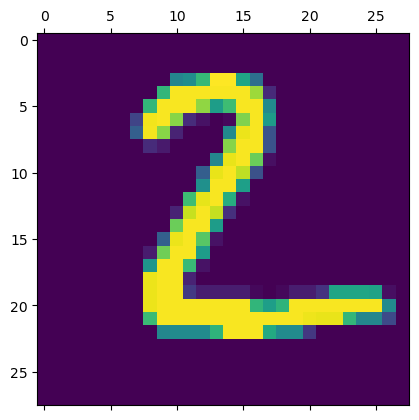

In [23]:
plt.matshow(x_test[1])

In [24]:
np.argmax(predict[9])

9

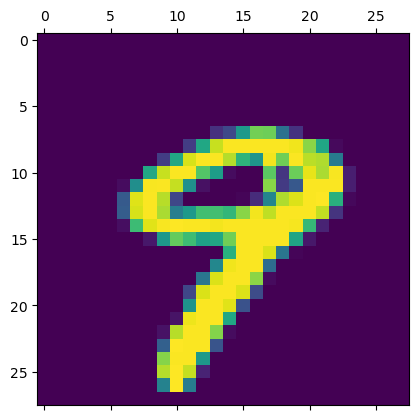

In [25]:
plt.matshow(x_test[9])

In [26]:
np.argmax(predict[5])

1

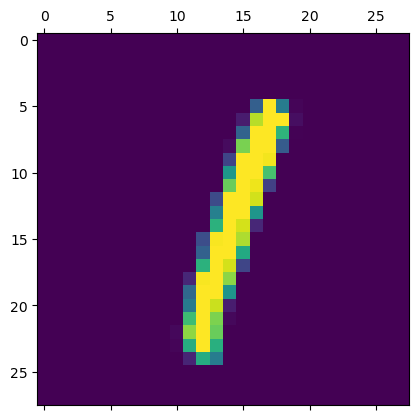

In [27]:
plt.matshow(x_test[5])

In [28]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test.argmax(axis=1), predictions=predict.argmax(axis=1))
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    2,    0,    0,    0,    3,    1,    1,    0],
       [   0, 1131,    1,    0,    0,    1,    1,    1,    0,    0],
       [   2,    2, 1019,    1,    0,    0,    3,    4,    1,    0],
       [   0,    0,    3,  999,    0,    1,    0,    2,    5,    0],
       [   0,    0,    0,    0,  979,    0,    1,    1,    0,    1],
       [   2,    0,    0,    9,    0,  873,    3,    1,    3,    1],
       [   2,    3,    1,    0,    2,    1,  949,    0,    0,    0],
       [   1,    5,    7,    1,    2,    0,    0, 1010,    2,    0],
       [   1,    1,    1,    1,    3,    0,    2,    3,  961,    1],
       [   1,    4,    0,    4,   25,    3,    0,   10,    7,  955]])>

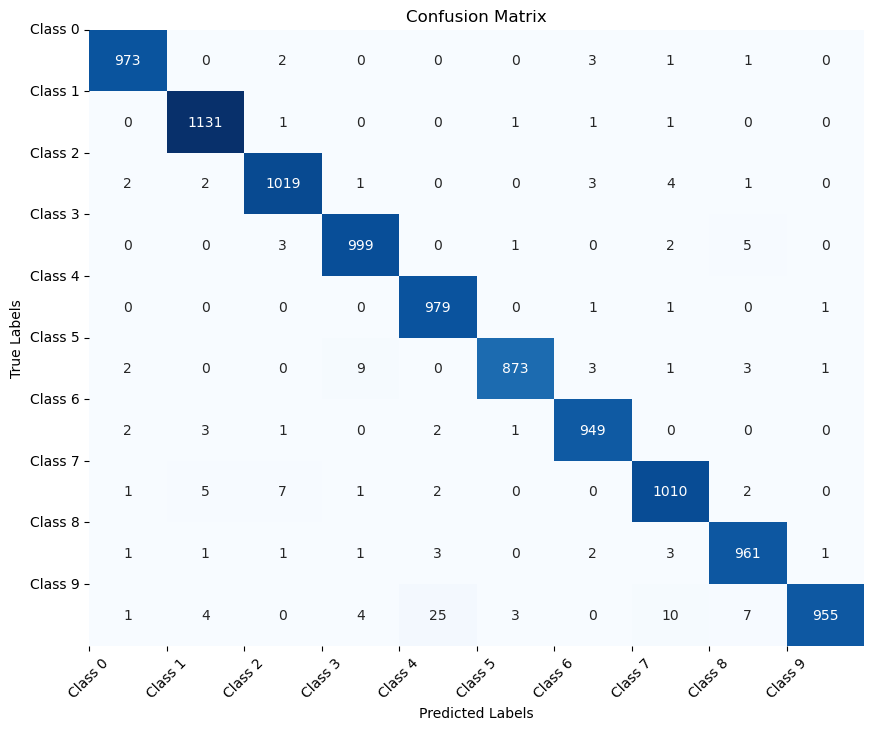

In [29]:
# Plot the confusion matrix heatmap with Seaborn
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

class_names = [f'Class {i}' for i in range(10)] 
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.yticks(ticks=range(10), labels=class_names,rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

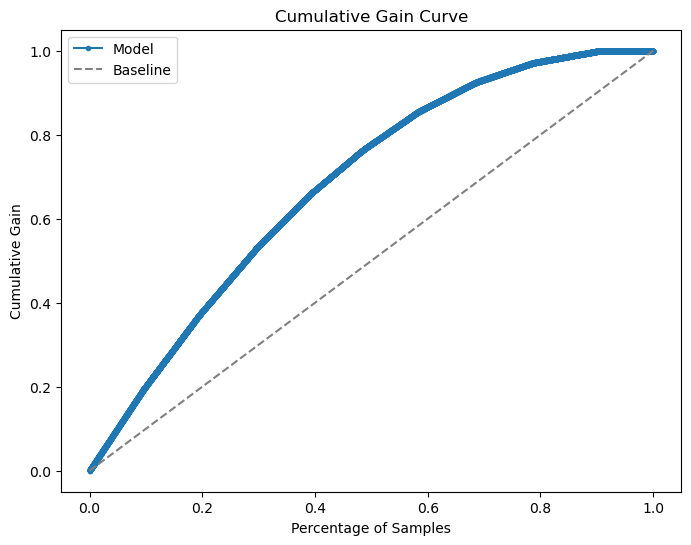

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have computed y_scores and y_true
y_scores = predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Sort the true labels and predicted scores in descending order
indices = np.argsort(y_scores)[::-1]
sorted_y_scores = y_scores[indices]
sorted_y_true = y_true[indices]

# Calculate the cumulative gain
total_positive = np.sum(sorted_y_true)
cumulative_positive = np.cumsum(sorted_y_true)
cumulative_gain = cumulative_positive / total_positive

# Calculate the baseline gain (random model)
baseline_gain = np.linspace(0, 1, len(y_true))

plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, len(y_true)), cumulative_gain, marker='.')
plt.plot(np.linspace(0, 1, len(y_true)), baseline_gain, color='gray', linestyle='--')
plt.xlabel('Percentage of Samples')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain Curve')
plt.legend(['Model', 'Baseline'])
plt.show()


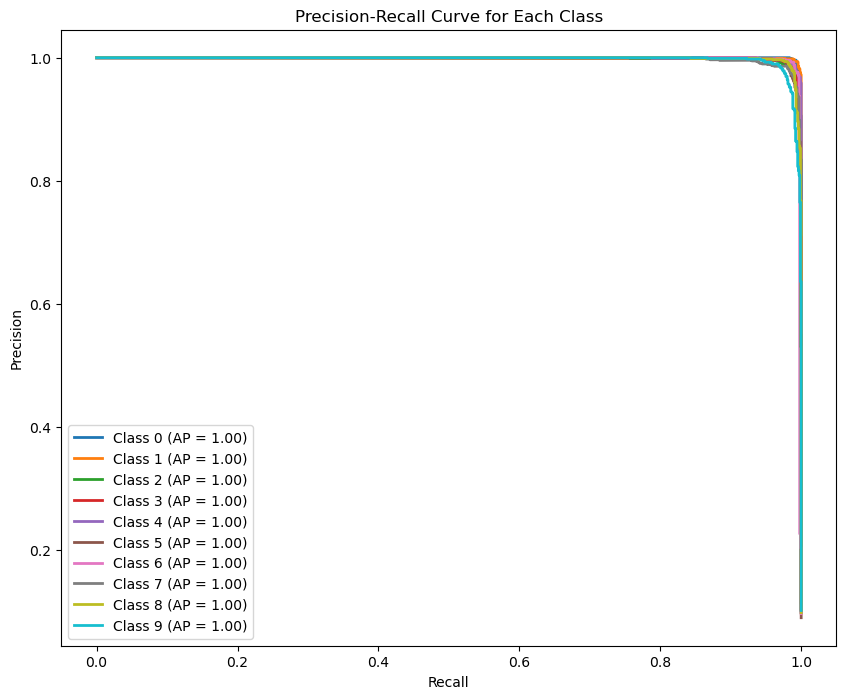

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming you have computed y_scores and y_true
y_scores = predict 
y_true = y_test      
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(y_scores[0])  # Number of classes

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_scores[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:0.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class")
plt.legend(loc="best")
plt.show()


In [45]:
import pickle
with open('Bhara_mnist.h5.pickle','wb') as f:
    pickle.dump(model,f)

In [46]:
model.save('Bharath_mnist.h5')

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
